# [Categorical Data in Python](https://www.datacamp.com/completed/statement-of-accomplishment/course/008f3e4300382005331cda69083361dfe1a553f5)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/data_science/categorical_data_in_python/notebook.ipynb)

**Contents**
- [Introduction](#Introduction)
- [Categorical Series](#Categorical-Series)
- [Visualizing Categorical Data](#Visualizing-Categorical-Data)
- [Encoding Labels](#Encoding-Labels)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

BASE_URL = "https://raw.githubusercontent.com/adamelliotfields/datacamp/main/notebooks/data_science/categorical_data_in_python/"

pd.set_option("display.width", 300)

adult = pd.read_csv(BASE_URL + "adult.csv")
dogs = pd.read_csv(BASE_URL + "dogs.csv")
reviews = pd.read_csv(BASE_URL + "reviews.csv")
used_cars = pd.read_csv(BASE_URL + "used_cars.csv")

## Introduction

In [2]:
# print description of `Above/Below 50k`
print(adult["Above/Below 50k"].describe())

count      10000
unique         2
top        <=50K
freq        7621
Name: Above/Below 50k, dtype: object


In [3]:
# print normalized frequency table
print(adult["Above/Below 50k"].value_counts(normalize=True))

Above/Below 50k
 <=50K    0.7621
 >50K     0.2379
Name: proportion, dtype: float64


### Setting dtype When Reading Data

In [4]:
# create a dict with keys `Workclass`, `Education`, `Relationship`, and `Above/Below 50k`
# set the value to "category"
adult_dtypes = dict.fromkeys(
    ["Workclass", "Education", "Relationship", "Above/Below 50k"],
    "category",
)

# read in `adult.csv` with `dtype=adult_dtypes`
adult = pd.read_csv(BASE_URL + "adult.csv", dtype=adult_dtypes)

### Creating Groups

In [5]:
# group by `Sex` and `Above/Below 50k`
gb = adult.groupby(by=["Sex", "Above/Below 50k"], observed=False)

# print the size
print(gb.size())

Sex      Above/Below 50k
 Female   <=50K             2919
          >50K               378
 Male     <=50K             4702
          >50K              2001
dtype: int64


In [6]:
user_list = ["Education", "Above/Below 50k"]
gb = adult.groupby(by=user_list, observed=False)

# print mean `Hours/Week` for each group
print(gb["Hours/Week"].mean())

Education      Above/Below 50k
 10th           <=50K             38.224265
                >50K              46.695652
 11th           <=50K             34.446991
                >50K              49.000000
 12th           <=50K             33.500000
                >50K              42.142857
 1st-4th        <=50K             36.145833
                >50K              40.000000
 5th-6th        <=50K             40.395062
                >50K              47.000000
 7th-8th        <=50K             38.760638
                >50K              46.058824
 9th            <=50K             36.890411
                >50K              46.142857
 Assoc-acdm     <=50K             40.175214
                >50K              43.821429
 Assoc-voc      <=50K             40.622642
                >50K              43.132653
 Bachelors      <=50K             40.525494
                >50K              45.372197
 Doctorate      <=50K             42.250000
                >50K              48.261364
 

## Categorical Series

In [7]:
# convert to categorical
dogs["keep_in"] = dogs["keep_in"].astype("category")

# add new categories
new_categories = ["Unknown History", "Open Yard (Countryside)"]
dogs["keep_in"] = dogs["keep_in"].cat.add_categories(new_categories)

# print freq
print(dogs["keep_in"].value_counts(dropna=False))

keep_in
both flat and garden       1224
NaN                        1021
garden                      510
flat                        182
Unknown History               0
Open Yard (Countryside)       0
Name: count, dtype: int64


In [8]:
# convert "maybe" to "no" and print categories
dogs.loc[dogs["likes_children"] == "maybe", "likes_children"] = "no"
dogs["likes_children"] = dogs["likes_children"].astype("category")
print(dogs["likes_children"].cat.categories)

Index(['no', 'yes'], dtype='object')


### Updating Categories

In [9]:
my_changes = {"Maybe?": "Maybe"}

# rename categories
dogs["likes_children"] = dogs["likes_children"].cat.rename_categories(my_changes)

# convert categories to uppercase
dogs["likes_children"] = dogs["likes_children"].cat.rename_categories(lambda x: x.upper())

# print categories
print(dogs["likes_children"].cat.categories)

Index(['NO', 'YES'], dtype='object')


### Collapsing Categories

In [10]:
# Create the update_coats dictionary
update_coats = {"wirehaired": "medium", "medium-long": "medium"}

# Create a new column, coat_collapsed
dogs["coat_collapsed"] = dogs["coat"].replace(update_coats)

# Convert the column to categorical
dogs["coat_collapsed"] = dogs["coat_collapsed"].astype("category")

# Print the frequency table
print(dogs["coat_collapsed"].value_counts())

coat_collapsed
short     1972
medium     785
long       180
Name: count, dtype: int64


### Reordering Categories

In [11]:
# reorder
dogs["size"] = dogs["size"].astype("category")
dogs["size"].cat.reorder_categories(new_categories=["small", "medium", "large"], ordered=True)

# do larger dogs need more room to roam?
print(dogs.groupby(by="size", observed=False)["keep_in"].value_counts())

size    keep_in                
large   both flat and garden       191
        garden                     172
        flat                         5
        Unknown History              0
        Open Yard (Countryside)      0
medium  both flat and garden       795
        garden                     317
        flat                        97
        Unknown History              0
        Open Yard (Countryside)      0
small   both flat and garden       238
        flat                        80
        garden                      21
        Unknown History              0
        Open Yard (Countryside)      0
Name: count, dtype: int64


### Cleaning Categories

In [12]:
replace_map = {"Malez": "male"}

# update `sex` column
dogs["sex"] = dogs["sex"].replace(replace_map)

# strip leading whitespace
dogs["sex"] = dogs["sex"].str.strip()

# make lowercase
dogs["sex"] = dogs["sex"].str.lower()

# make categorical
dogs["sex"] = dogs["sex"].astype("category")

In [13]:
# print count of male and female dogs who have long coats
print(dogs.loc[dogs["coat"] == "long", "sex"].value_counts())

sex
male      124
female     56
Name: count, dtype: int64


In [14]:
# print mean age of English Cocker Spaniels
print(dogs.loc[dogs["breed"] == "English Cocker Spaniel", "age"].mean())

8.186153846153847


In [15]:
# print dogs that have "English" in their breed name
print(dogs.loc[dogs["breed"].str.contains("English"), "breed"])

67            English Greyhound, Spanish Greyhound Mix
225                              English Greyhound Mix
400                         English Cocker Spaniel Mix
403                         English Cocker Spaniel Mix
406                         English Cocker Spaniel Mix
407     English Cocker Spaniel, Labrador Retriever Mix
408                         English Cocker Spaniel Mix
409                         English Cocker Spaniel Mix
410                English Cocker Spaniel, Terrier Mix
411              Dachshund, English Cocker Spaniel Mix
414                             English Cocker Spaniel
416                         English Cocker Spaniel Mix
418                             English Cocker Spaniel
420                         English Cocker Spaniel Mix
421                         English Cocker Spaniel Mix
423                 English Cocker Spaniel, Vizsla Mix
426                             English Cocker Spaniel
427                         English Cocker Spaniel Mix
428       

## Visualizing Categorical Data

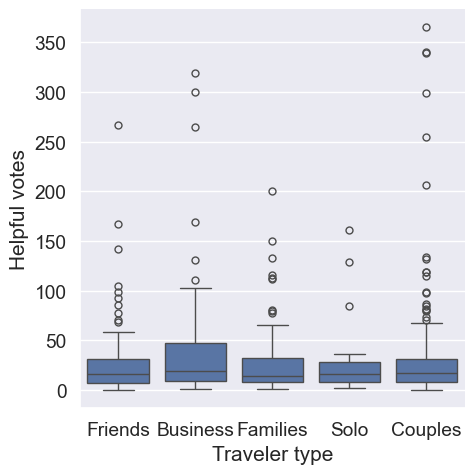

In [16]:
# set font size to 1.25 and background to "darkgrid"
sns.set(font_scale=1.25)
sns.set_style("darkgrid")

# cat plot traveler type vs helpful votes
sns.catplot(
    data=reviews,
    x="Traveler type",
    y="Helpful votes",
    kind="box",
)
plt.show()

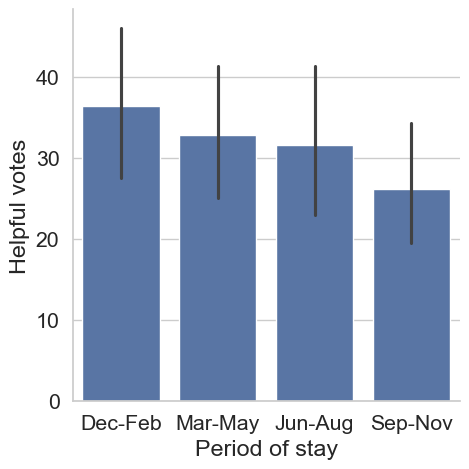

In [17]:
sns.set(font_scale=1.4)
sns.set_style("whitegrid")

# bar plot `Helpful votes` by `Period of stay`
sns.catplot(
    data=reviews,
    y="Helpful votes",
    x="Period of stay",
    kind="bar",
)
plt.show()

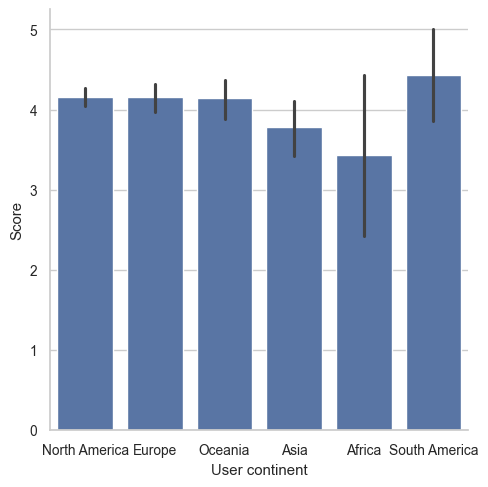

In [18]:
sns.set(font_scale=0.9)
sns.set_style("whitegrid")

# convert `User continent` to a Categorical
reviews["User continent"] = reviews["User continent"].astype("category")

# reorder
continent_categories = list(reviews["User continent"].value_counts().index)
reviews["User continent"] = reviews["User continent"].cat.reorder_categories(continent_categories)

# cat plot `Score`
sns.catplot(
    data=reviews,
    y="Score",
    x="User continent",
    kind="bar",
)
plt.show()

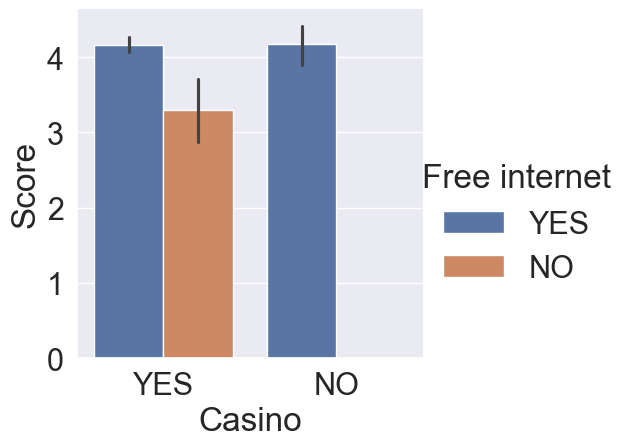

In [19]:
sns.set(font_scale=2)
sns.set_style("darkgrid")

# cat plot `Score` by `Casino` colored by `Free internet`
sns.catplot(
    data=reviews,
    y="Score",
    x="Casino",
    hue="Free internet",
    kind="bar",
)
plt.show()

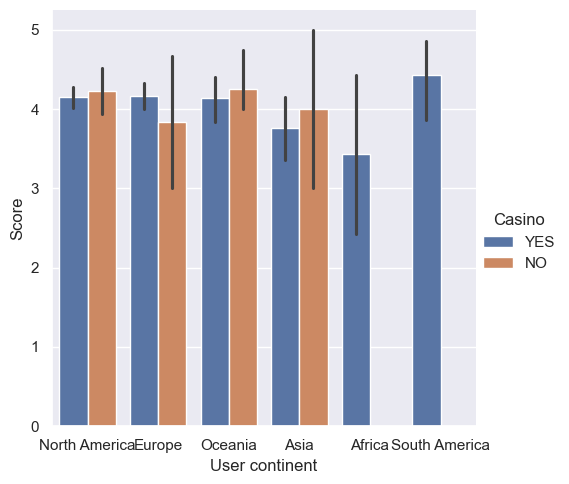

In [20]:
sns.set(font_scale=1)
sns.set_style("darkgrid")

# cat plot `Score` by `User continent` colored by `Casino`
sns.catplot(
    data=reviews,
    y="Score",
    x="User continent",
    hue="Casino",
    kind="bar",
)
plt.show()

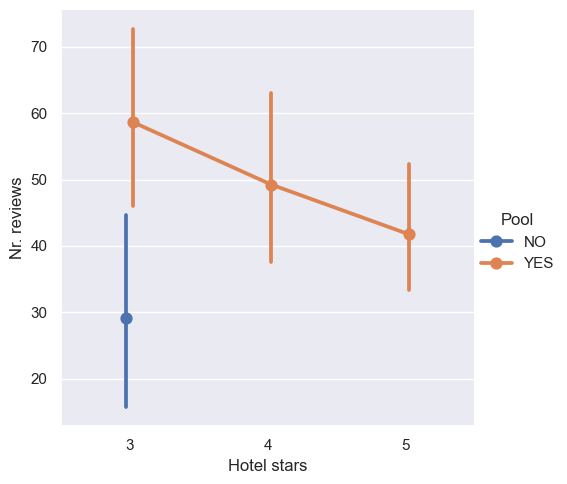

In [21]:
# cat point plot `Nr. reviews` by `Hotel stars` colored by `Pool` (no overlapping lines)
sns.catplot(
    data=reviews,
    y="Nr. reviews",
    x="Hotel stars",
    hue="Pool",
    kind="point",
    dodge=True,
)
plt.show()

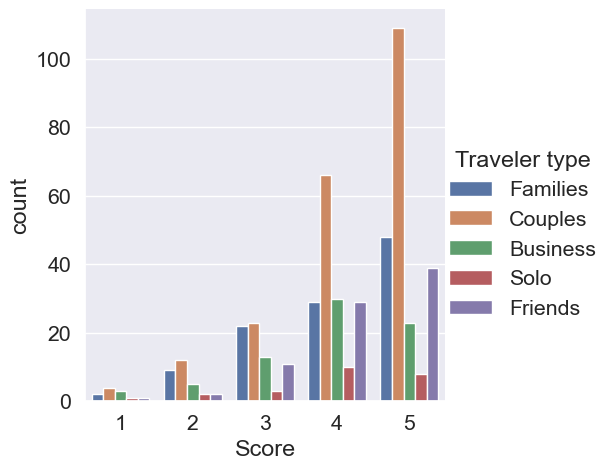

In [22]:
sns.set(font_scale=1.4)
sns.set_style("darkgrid")

# cat count plot `Score` colored by `Traveler type`
sns.catplot(
    data=reviews,
    x="Score",
    hue="Traveler type",
    kind="count",
)
plt.show()

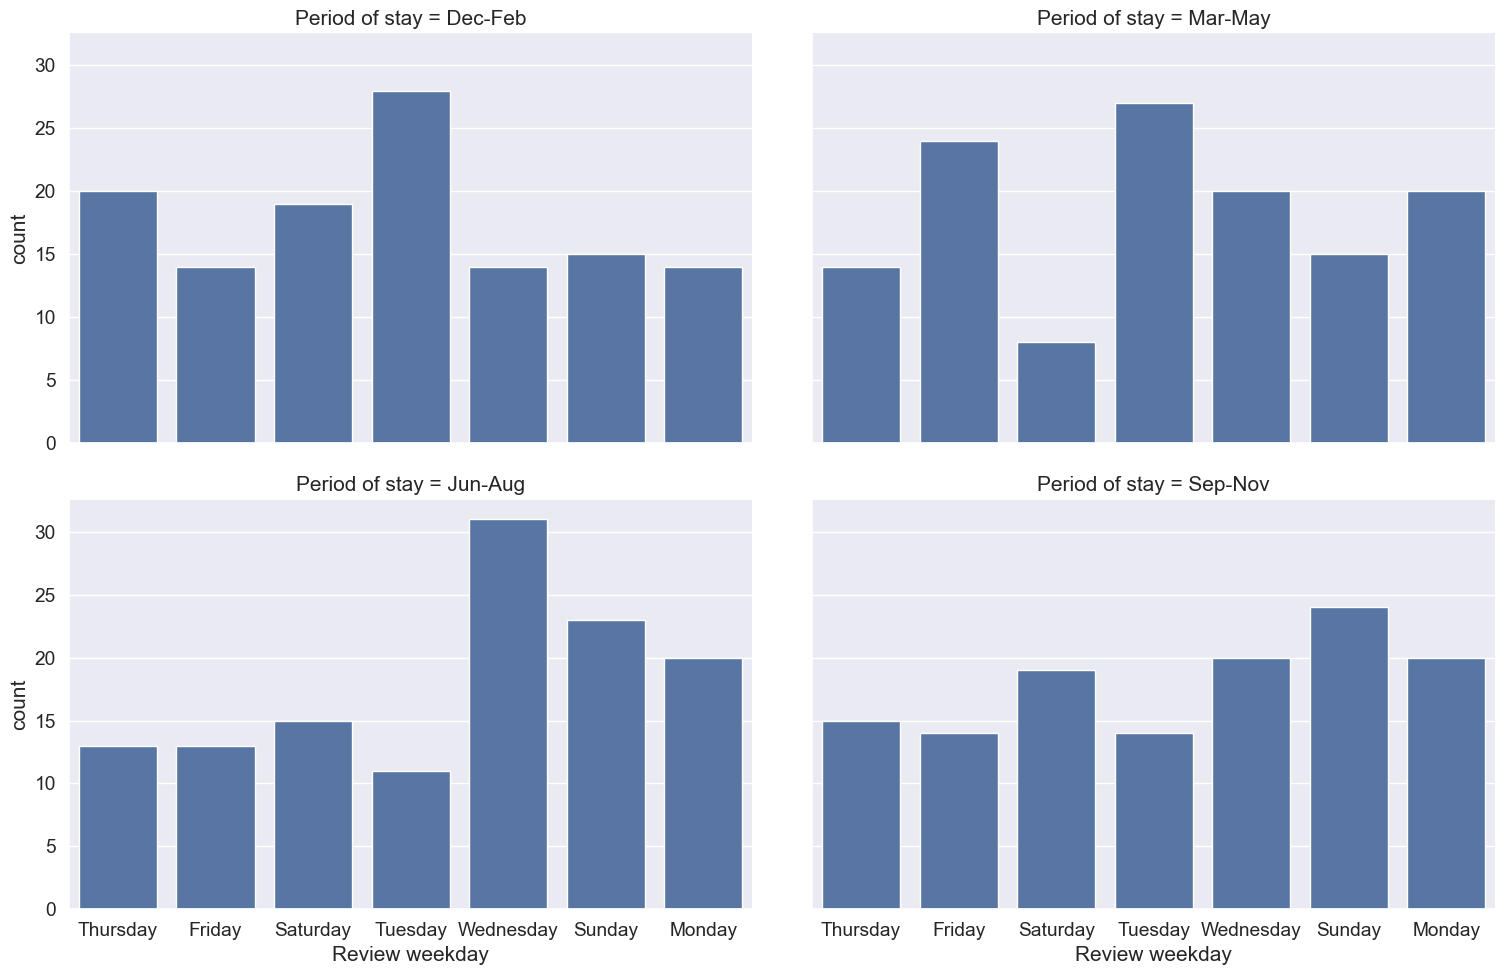

In [23]:
sns.set(font_scale=1.25)

# cat count plot `Review weekday`
# split by `Period of stay`, 2 per row
ax = sns.catplot(
    data=reviews,
    x="Review weekday",
    col="Period of stay",
    col_wrap=2,
    kind="count",
)

ax.fig.set_figwidth(16)
plt.show()

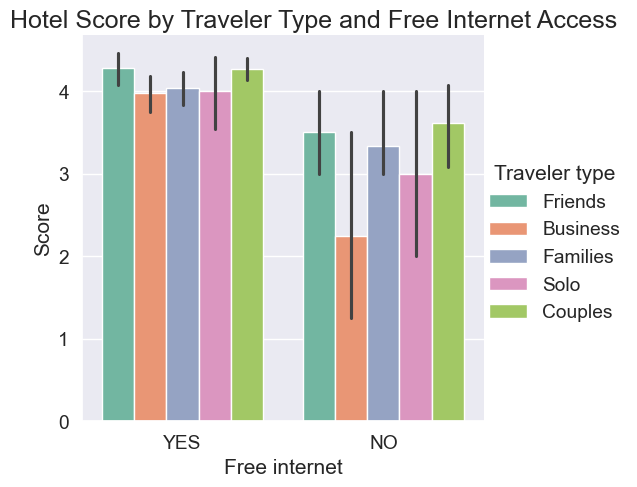

In [24]:
# cat bar plot `Score` by `Free internet` colored by `Traveler type` using "Set2"
ax = sns.catplot(
    data=reviews,
    y="Score",
    x="Free internet",
    hue="Traveler type",
    kind="bar",
    palette="Set2",
)

# add title
ax.fig.suptitle("Hotel Score by Traveler Type and Free Internet Access")

# update labels
ax.set_axis_labels(
    ylabel="Average Review Rating",
    xlabel="Free Internet",
)

# adjust starting height to be 93%
plt.subplots_adjust(top=0.93)
plt.show()

## Encoding Labels

In [25]:
# change NaN values to "other"
used_cars.loc[used_cars["body_type"].isna(), "body_type"] = "other"

# convert to title case
used_cars["body_type"] = used_cars["body_type"].str.title()
print(used_cars["body_type"].dtype)

object


In [26]:
# create label encoding
used_cars["color"] = used_cars["color"].astype("category")
used_cars["color_code"] = used_cars["color"].cat.codes
codes = used_cars["color_code"]
categories = used_cars["color"]

# zip together
color_map = dict(zip(codes, categories))
print(color_map)

{8: 'silver', 1: 'blue', 7: 'red', 0: 'black', 4: 'grey', 6: 'other', 2: 'brown', 10: 'white', 3: 'green', 9: 'violet', 5: 'orange', 11: 'yellow'}


In [27]:
# boolean column if name contains "Subaru"
used_cars["is_subaru"] = np.where(
    used_cars["manufacturer_name"].str.contains("Subaru", regex=False),
    # use 1 instead of true and 0 instead of false
    1,
    0,
)
print(used_cars["is_subaru"].value_counts())

is_subaru
0    4709
1     291
Name: count, dtype: int64


### One-hot Encoding

In [28]:
# create new dataset with one-hot encoded `manufacturer_name` and `transmission`
dummy_columns = ["manufacturer_name", "transmission"]
used_cars_simple = pd.get_dummies(
    used_cars,
    columns=dummy_columns,
    # prefix all new columns with "dummy"
    prefix=["dummy"] * len(dummy_columns),
)
display(used_cars_simple.head())

,model_name,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,...,dummy_Dodge,dummy_Kia,dummy_LADA,dummy_Lexus,dummy_Opel,dummy_Subaru,dummy_Москвич,dummy_УАЗ,dummy_automatic,dummy_mechanical
0,Outback,silver,190000,2010,gasoline,False,gasoline,2.5,Universal,False,...,False,False,False,False,False,True,False,False,True,False
1,Outback,blue,290000,2002,gasoline,False,gasoline,3.0,Universal,False,...,False,False,False,False,False,True,False,False,True,False
2,Forester,red,402000,2001,gasoline,False,gasoline,2.5,Suv,False,...,False,False,False,False,False,True,False,False,True,False
3,Impreza,blue,10000,1999,gasoline,False,gasoline,3.0,Sedan,False,...,False,False,False,False,False,True,False,False,False,True
4,Legacy,black,280000,2001,gasoline,False,gasoline,2.5,Universal,False,...,False,False,False,False,False,True,False,False,True,False
